In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor

from sklearn import metrics

In [2]:
df = pd.read_csv('../data/cleaned_cdc.csv')
print(df.shape)
df.head(15)

(51404, 9)


,YearStart,LocationAbbr,LocationDesc,Data_Value,Sample_Size,GeoLocation,QuestionID,StratificationCategoryId1,StratificationID1
0,2011,AL,Alabama,32.0,7304.0,"(32.84057112200048, -86.63186076199969)",Q036,OVR,OVERALL
1,2011,AL,Alabama,32.3,2581.0,"(32.84057112200048, -86.63186076199969)",Q036,GEN,MALE
2,2011,AL,Alabama,31.8,4723.0,"(32.84057112200048, -86.63186076199969)",Q036,GEN,FEMALE
3,2011,AL,Alabama,33.6,1153.0,"(32.84057112200048, -86.63186076199969)",Q036,EDU,EDUHS
4,2011,AL,Alabama,32.8,2402.0,"(32.84057112200048, -86.63186076199969)",Q036,EDU,EDUHSGRAD
5,2011,AL,Alabama,33.8,1925.0,"(32.84057112200048, -86.63186076199969)",Q036,EDU,EDUCOTEC
6,2011,AL,Alabama,26.4,1812.0,"(32.84057112200048, -86.63186076199969)",Q036,EDU,EDUCOGRAD
7,2011,AL,Alabama,16.3,356.0,"(32.84057112200048, -86.63186076199969)",Q036,AGEYR,AGEYR1824
8,2011,AL,Alabama,35.2,598.0,"(32.84057112200048, -86.63186076199969)",Q036,AGEYR,AGEYR2534
9,2011,AL,Alabama,35.5,865.0,"(32.84057112200048, -86.63186076199969)",Q036,AGEYR,AGEYR3544


In [3]:
df = df[df['StratificationID1'] != 'OVERALL']
df.head()

,YearStart,LocationAbbr,LocationDesc,Data_Value,Sample_Size,GeoLocation,QuestionID,StratificationCategoryId1,StratificationID1
1,2011,AL,Alabama,32.3,2581.0,"(32.84057112200048, -86.63186076199969)",Q036,GEN,MALE
2,2011,AL,Alabama,31.8,4723.0,"(32.84057112200048, -86.63186076199969)",Q036,GEN,FEMALE
3,2011,AL,Alabama,33.6,1153.0,"(32.84057112200048, -86.63186076199969)",Q036,EDU,EDUHS
4,2011,AL,Alabama,32.8,2402.0,"(32.84057112200048, -86.63186076199969)",Q036,EDU,EDUHSGRAD
5,2011,AL,Alabama,33.8,1925.0,"(32.84057112200048, -86.63186076199969)",Q036,EDU,EDUCOTEC


In [4]:
df.shape

(49568, 9)

In [5]:
df = df[df['QuestionID'].isin(['Q036', 'Q037'])]

In [6]:
df.shape

(16524, 9)

In [7]:
X = df[['LocationAbbr', 'StratificationID1']]
y = df['Data_Value']

In [8]:
X = pd.get_dummies(data = X, columns = ['LocationAbbr', 'StratificationID1'], drop_first = True)

In [9]:
X.shape

(16524, 76)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [11]:
# Pipelines from survey code
def model(model):
    models = model
    models.fit(X_train, y_train)
    print(f'{model}')
    print(f'Training r2 score: {models.score(X_train, y_train)}')
    print(f'Testing r2 score: {models.score(X_test, y_test)}')
    print(f'Testing MSE: {metrics.mean_squared_error(y_test, models.predict(X_test))}')
    return print('='*40)

In [12]:
model(LinearRegression())
model(KNeighborsRegressor())
model(DecisionTreeRegressor())
model(BaggingRegressor())
model(RandomForestRegressor())
model(AdaBoostRegressor())

LinearRegression()
Training r2 score: 0.3251383474848043
Testing r2 score: 0.35652203633547475
Testing MSE: 28.543200177520138
KNeighborsRegressor()
Training r2 score: 0.3067586723839787
Testing r2 score: 0.20424581905726202
Testing MSE: 35.29782239845074
DecisionTreeRegressor()
Training r2 score: 0.37795679613574285
Testing r2 score: 0.26694634881044055
Testing MSE: 32.5165713330847
BaggingRegressor()
Training r2 score: 0.37006817817476767
Testing r2 score: 0.2564198631287353
Testing MSE: 32.983501989524946
RandomForestRegressor()
Training r2 score: 0.3772129434219996
Testing r2 score: 0.2655248833775251
Testing MSE: 32.57962426525672
AdaBoostRegressor()
Training r2 score: 0.042826270690380475
Testing r2 score: 0.06121470629788861
Testing MSE: 41.64235307958636


<AxesSubplot:>

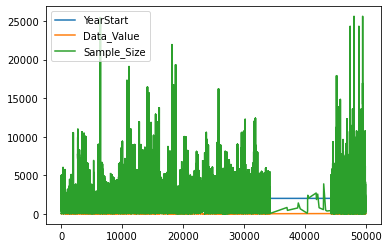

In [13]:
df.plot()